# Comparing Public Sector Hospital Nurse Salaries and employment Across Countries
MSc in Date Analytics


**Abstract**

 ***Comparison of Ireland's Public Sector Employment and Earnings with other countries worldwide***

Scenario Ireland's Public Sector Employment has received worldwide attention for some time in different areas for example health professionals in specific nursing sectors.


The salary of nurses in hospitals varies significantly based on factors such as location, experience, education, and the specific healthcare facility. The aim of this research is to compare Scenario Ireland's salary of nurses in hospital and comparing the salary with other countries worldwide, salary, profiles, practices, and performance in Australia   Europe, including (Luxembourg, Belgium, Netherlands, Denmark, Germany, Spain, Ireland, Slovenia, EU20, Poland, Czech Republic, France, Finland, Italy, Greece, Hungary, Estonia, Slovak Republic, Portugal, Latvia, Lithuania, Iceland, Switzerland, Norway, United Kingdom, Turkey).

As of my last update, the salary nurse in Ireland 2022 is the third highest wage US ($ 64,000) if I want to compare average nurse salaries around the world. The average salary of healthcare workers can vary significantly. To obtain the most accurate and to update information, it is recommended to refer to recent salary surveys, government labour statistics, or reputable healthcare industry sources for the specific location of interest. Please note that salaries may have changed since my last update


**Keywords: Nurse; Salary; Hospital; Ireland; Countries; Variable; Health**



### Stages of the project

this project is divided in four stages, each in one Notebook:

*Notebook 1. Data Preparation

*Notebook 2. Exploratory Data Analysis

*Notebook 4. Statistical Analysis and Hipothesis Testing

*Notebook 4. Machine Learning for Data Analysis




# 4. **Module 4. Machine Learning**

In previous stage we tried to solve different research questions by establishing hypothesis and test them using statistical tests. However, the dataset has some limitations and the majority of the assumptions needed for the tests are not met.

The alternative is to use more complex algorithms to solve more in -depth questions using machine learning to "learn"about the features in the dataset and be able to answer the questions with a better degree of confidence. In this way, solving the limitations of the statistical methods for this case.

# 4.1. Machine Learning Strategy



## 4.1.1. Define Analytical problems


With the given dataset, several analytical problems can be addressed using machine learning algorithms. Here are some potential problems along with the corresponding machine learning algorithms that can be used to solve them:

**Supervised Learning**

- Income Prediction: Predicting a profession's average income based on other variables like employment type, country, year, and economic indicators.
        Algorithms: Linear Regression, Decision Tree Regressor, Random Forest Regressor.

- Country Classification: Classifying countries based on their economic indicators and average wages.
        Algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machine (SVM).

- Employment Type Prediction: Predicting the type of employment (e.g., full-time, part-time) based on other variables.
        Algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, k-Nearest Neighbors (k-NN).

- Outlier Detection: Identifying unusual or extreme data points that deviate significantly from the rest of the data.
        Algorithms: Isolation Forest, One-Class SVM, Local Outlier Factor (LOF).

- Time Series Forecasting: Predicting income trends over time for specific countries or employment types.
        Algorithms: Time Series models (e.g., ARIMA, SARIMA, Prophet).


**Unsupervised Learning**

- Cluster Analysis: Grouping similar countries or individuals based on their income and economic indicators.
        Algorithms: K-Means Clustering, Hierarchical Clustering.

- Feature Importance: Identifying which features have the most significant impact on income levels.
        Algorithms: Feature Importance from Decision Trees, Permutation Importance.

- Dimensionality Reduction: Reducing the number of features while retaining most of the information to simplify analysis or visualization.
        Algorithms: Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE).

- Anomaly Detection: Identifying unusual patterns or deviations in income or economic indicators.
        Algorithms: Autoencoders, One-Class SVM, Local Outlier Factor (LOF).

- Regression Analysis: Modeling the relationship between income and other economic indicators.
        Algorithms: Linear Regression, Ridge Regression, Lasso Regression.

## 4.1.2. Scoring Metrics

To evaluate the performance of a machine learning algorithm like linear regression, several metrics can be used to assess how well the model predicts the target variable. The choice of the evaluation metrics depends on the nature of the problem (regression or classification) and the specific goals of the analysis. For linear regression, the main evaluation metrics are:

-    Mean Absolute Error (MAE): MAE is the average absolute difference between the predicted values and the actual values. It measures the average magnitude of errors, regardless of their direction. Lower MAE indicates better performance.

-    Mean Squared Error (MSE): MSE is the average of the squared differences between predicted and actual values. It penalizes larger errors more than MAE and is commonly used in regression problems. Lower MSE indicates better performance.

-    Root Mean Squared Error (RMSE): RMSE is the square root of MSE. It is in the same unit as the target variable, making it more interpretable and directly comparable to the original data.

-    R-squared (R2): R-squared represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). It measures the goodness of fit of the model, with higher values indicating a better fit. R-squared ranges from 0 to 1, where 1 means the model perfectly fits the data.

## 4.1.1. Choose appropriate features

The variables in the dataset are the country, year, profession, type of employment and the flags.

## 4.1.1. Target Feature

We are going to use ML first to predict the value of the income in the missing parts of the dataset and then to predict future incomes.

# 4.2. Supervised Learning

Supervised learning is a type of machine learning where the algorithm learns from a labeled dataset, meaning that each input data point (or observation) is associated with the correct output (or target). The goal of supervised learning is to learn a mapping between the input features (independent variables) and their corresponding labels (dependent variable) so that the algorithm can make accurate predictions on new, unseen data.

To utilize supervised learning for this dataset, I need to prepare the data, split it into training and testing sets, select the appropriate features, and use the target variable to train the model. Once trained, the model can make predictions on new, unseen data for the chosen task.

### Load Datasets

### IMPORTING LIBRARIES

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt           #visualisation
import seaborn as sns                     #visualisation
sns.set(color_codes=True)

In [ ]:
#prevent dataframe truncation by adjusting pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### ***TEMPORARY code to save and load data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Nurse Salaries Project/HEALTH_REAC_Augmented.csv'
df = pd.read_csv(file_path)

# Now I can work with the dataset stored in the 'df' DataFrame

In [ ]:
# Sort the countries alphabetically into a categorical variable
df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.reorder_categories(sorted(df['Country'].unique()))

In [ ]:
df.columns

Index(['Variable', 'Employment', 'Professional - Type of Employment',
       'Country', 'Year', 'Income per average wage', 'Income / per capita GDP',
       'Income PPP for private consumption, in US$',
       'Income, US$ exchange rate', 'Income at 2015 GDP price level, in US$'],
      dtype='object')

## 4.2.1. Prediction of features

The feature (Or attribute) of the dataset we are going to predict is the income.

There are missing data in the original dataset, so what we are going to do is to use different algorithms to predict its value.


### PREDICT THE MISSING VALUES WITH A ML ALGORITHM



#### Income prediction with Linear regression

**Data Preprocessing:**

Prepare the data for training the model.  I will need to convert categorical variables (year, profession, country) into numerical representations using techniques like one-hot encoding or label encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select the features (independent variables) for the model
X = df[["Year", 'Professional - Type of Employment', 'Country']]

# Perform one-hot encoding to convert categorical variables into numerical representations
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Split the Data:**

Split the dataset into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Select the target variable (dependent variable)
y = df["Income at 2015 GDP price level, in US$"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape, X_test.shape, y_train.size, y_test.size)

(936, 45) (234, 45) 936 234


**Create and Train the Model:**

Create a linear regression model and fit it to the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

**Make Predictions:**

Use the trained model to make predictions on the testing data.

In [ ]:
# Predict the income on the test set
y_pred = model.predict(X_test)

**Evaluate the Model:**

Finally, evaluate the performance of the model using appropriate metrics for regression tasks (e.g., mean squared error, R-squared).

A lower Mean Squared Error and a higher R-squared value indicate better model performance.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 549189984.6864334
R-squared: 0.8609326242633073


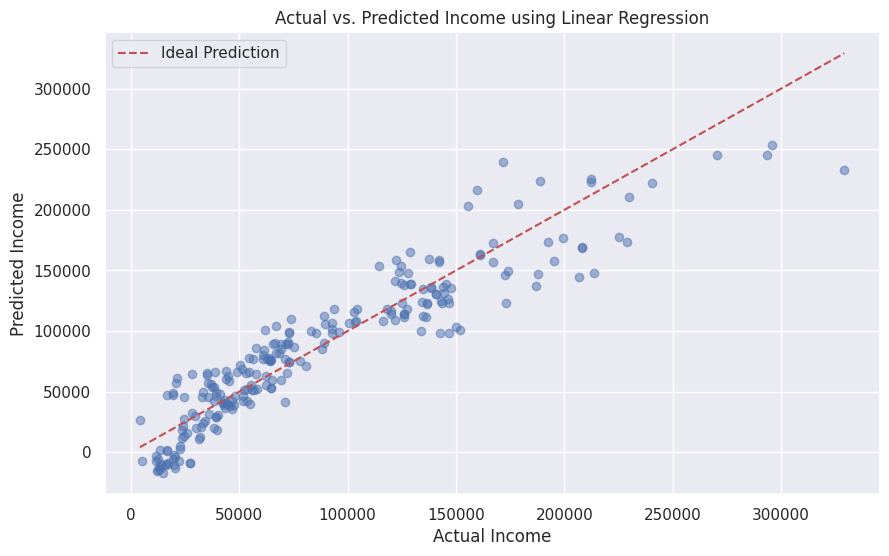

In [ ]:


# Plot the actual and predicted income values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Prediction')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs. Predicted Income using Linear Regression')
plt.legend()
plt.show()

## 4.2.2 Forecasting (prediction of future features)




**Data Preprocessing:**

Prepare the data for training the model.  I will need to convert the "Year" variable into a numerical representation using label encoding or one-hot encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select the features (independent variables) for the model
X = df[["Year"]]

# Encode the "Year" variable using label encoding
encoder = LabelEncoder()
X['year_encoded'] = encoder.fit_transform(X["Year"])
X.drop("Year", axis=1, inplace=True)

<ipython-input-39-1717c11b58d7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year_encoded'] = encoder.fit_transform(X["Year"])
<ipython-input-39-1717c11b58d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("Year", axis=1, inplace=True)


**Train-Test Split:**

Split the dataset into training and testing sets. Since we are forecasting, we will use the earliest years as training data and the most recent years as testing data.

In [ ]:
# Select the target variable (income)
y = df["Income at 2015 GDP price level, in US$"]

# Choose the split point for training and testing data
split_year = 2010

# Split the data into training and testing sets
X_train = X[X['year_encoded'] < split_year]
X_test = X[X['year_encoded'] >= split_year]
y_train = y[X['year_encoded'] < split_year]
y_test = y[X['year_encoded'] >= split_year]

In [ ]:
print(X_train.shape, X_test.shape, y_train.size, y_test.size)

(1170, 1) (0, 1) 1170 0


**Create and Train the Model:**

Create a linear regression model and fit it to the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

**Make Predictions:**

Use the trained model to make income predictions for the test set (future years).

In [ ]:
# Predict the income on the test set
y_pred = model.predict(X_test)

ValueError: ignored

**Evaluate the Model:**

Since this is a forecasting task, evaluating the model's performance can be different from typical supervised learning tasks. I can use metrics such as mean absolute error (MAE) or mean squared error (MSE) to assess the accuracy of the predictions.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

ValueError: ignored

*8Visualize the Forecasting Results:**

 I can create plots to visualize the actual income values and the predicted income values over time to understand how well the model is forecasting.

In [ ]:
# Create a time series plot to visualize the actual and predicted income over time
plt.figure(figsize=(10, 6))
plt.plot(df[df['year_encoded'] >= split_year]["Year"], y_test, label='Actual Income', marker='o')
plt.plot(df[df['year_encoded'] >= split_year]["Year"], y_pred, label='Predicted Income', marker='x')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.title('Income Forecasting using Linear Regression')
plt.show()

# 4.3. Unsupervised Learning

Unsupervised learning is a type of machine learning where the algorithm learns from an unlabeled dataset, meaning that the data does not have explicit target labels or categories. The goal of unsupervised learning is to find patterns, structures, or relationships within the data without any predefined output.

Unsupervised learning can provide valuable insights into the structure and patterns within the data, even when no explicit labels or targets are available. It can help in exploratory data analysis, outlier detection, and data visualization, among other applications.

## 4.3.1. Classification



## 4.3.2. Clustering



# 4.4. Critique Limitations of the Models

# 4.5. Conclusions





## 4.5.1. Employment

## 4.5.2. Earnings